# Bike Sharing Prediction Based on Attributes #

* Neural Network will be used as a regressor in order to predict the bike sharing based on the most important attributes. 

In [54]:
########### Basic Data Handling Import Set ###########
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Load ##

In [55]:
# Load Data as Pandas Dataframe:
bike_sharing_df = pd.read_csv('bike-sharing-daily.csv')
bike_sharing_df.reset_index(drop = True, inplace = True) # Clear index if it exists
bike_sharing_df.info()
bike_sharing_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Data Pre-processing ##

* Bike sharing values are indicated by the attribute 'cnt'. So 'cnt' is the prediction goal.

In [56]:
bike_sharing_df = bike_sharing_df.drop(labels=['instant', 'casual', 'registered'], axis = 1) # cut off useless attributes
bike_sharing_df.dteday = pd.to_datetime(bike_sharing_df.dteday, format = '%m/%d/%Y')         # change date type format
bike_sharing_df.index = pd.DatetimeIndex(bike_sharing_df.dteday)                             # use date as dataframe index
bike_sharing_df = bike_sharing_df.drop(labels=['dteday'], axis = 1)                          # cut off redundant date attribute
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


## Data Visualization ##

Text(0, 0.5, 'Bike rental')

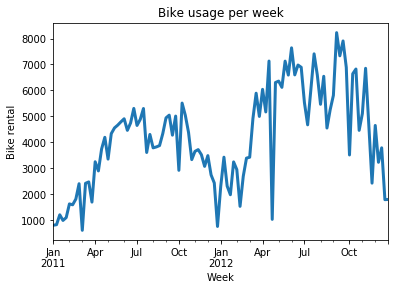

In [57]:
bike_sharing_df['cnt'].asfreq('W').plot(linewidth=3) # cnt freq per W, M, Q (week, month, quadri)
plt.title('Bike usage per week')
plt.xlabel('Week')
plt.ylabel('Bike rental')

Text(0, 0.5, 'Bike rental')

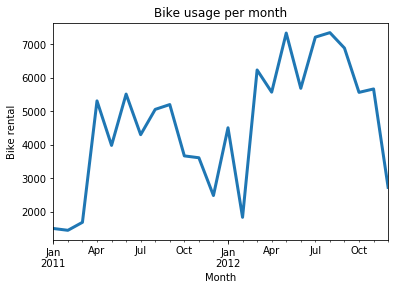

In [58]:
bike_sharing_df['cnt'].asfreq('M').plot(linewidth=3) # cnt freq per W, M, Q (week, month, quadri)
plt.title('Bike usage per month')
plt.xlabel('Month')
plt.ylabel('Bike rental')

Text(0, 0.5, 'Bike rental')

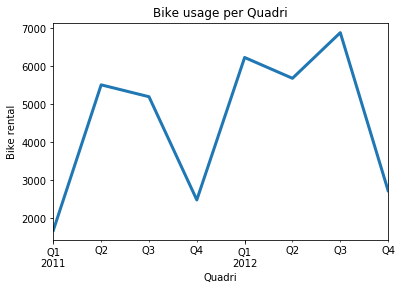

In [59]:
bike_sharing_df['cnt'].asfreq('Q').plot(linewidth=3) # cnt freq per W, M, Q (week, month, quadri)
plt.title('Bike usage per Quadri')
plt.xlabel('Quadri')
plt.ylabel('Bike rental')

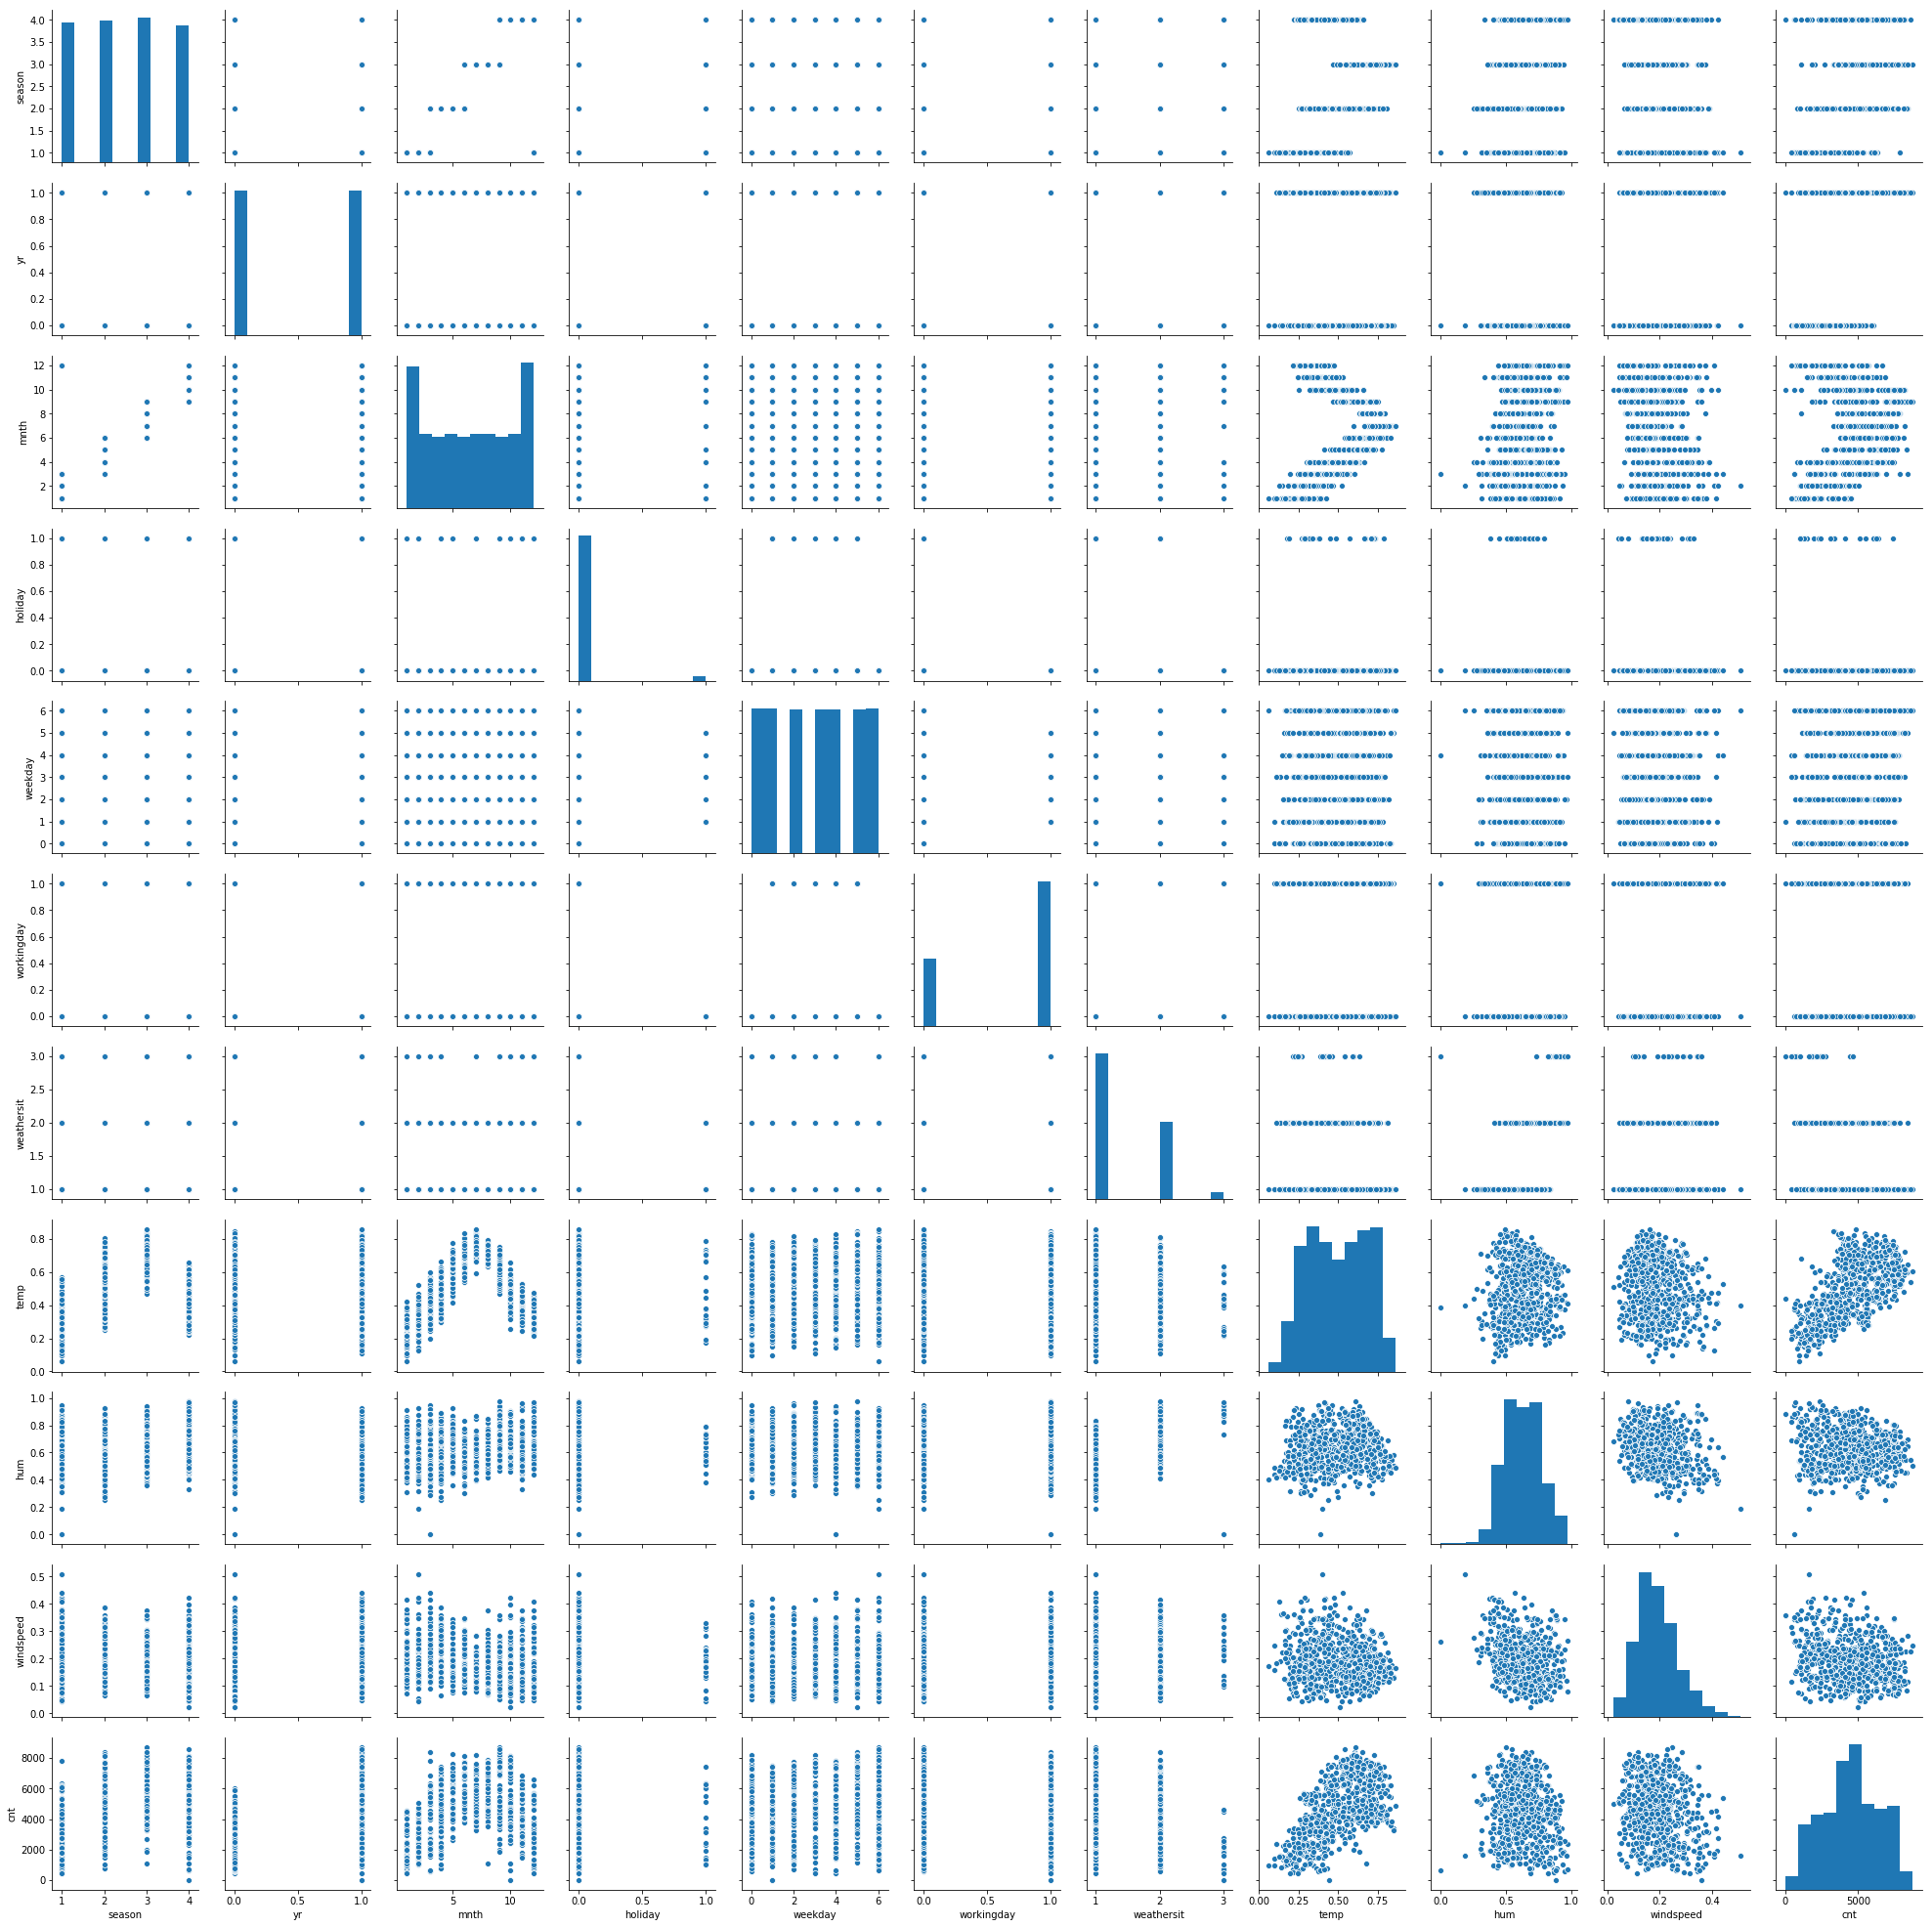

In [60]:
## Checking Attributes Relations:

sns.pairplot(bike_sharing_df);

## More Data Processing ##

* After checking the dataframe pairplot the attributes with most relation to 'cnt' share data are selected to be part of the desired dataframe.

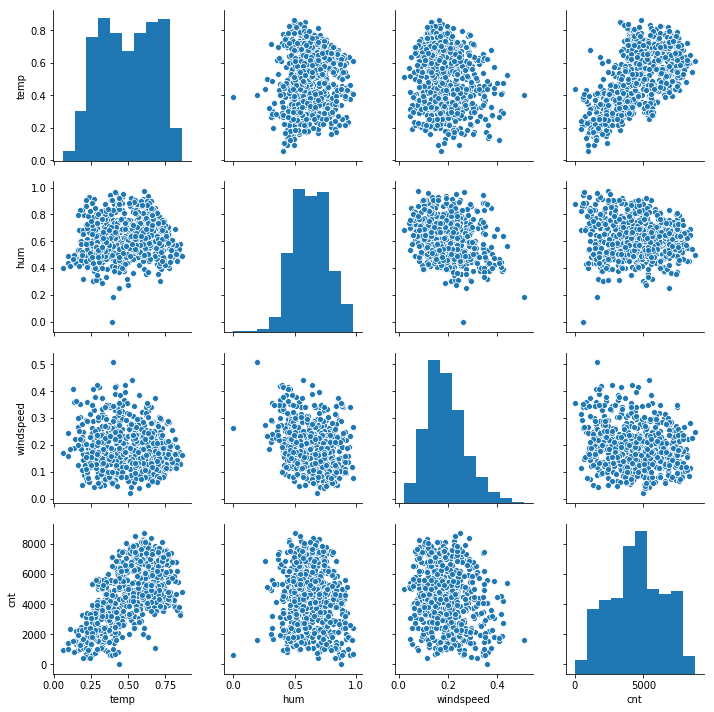

In [61]:
X_numerical = bike_sharing_df[['temp', 'hum', 'windspeed', 'cnt']] # attributes with most relation checked by pairplot
sns.pairplot(X_numerical);

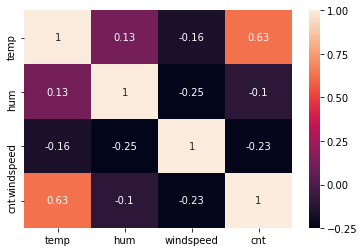

In [62]:
sns.heatmap(X_numerical.corr(), annot = True);

* The date related attributes can be encoded as a binary truth tabble as their true values don't actually mean. 

In [63]:
X_cat = bike_sharing_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
X_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


In [64]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat.shape
X_cat = pd.DataFrame(X_cat)
X_cat.head()

C:\Users\Mafeus\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:351: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = check_array(X, dtype=np.int)
C:\Users\Mafeus\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "catego

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


* Finally the dataframe with the desired information and format is concat:

In [65]:
X_numerical = X_numerical.reset_index()
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all = X_all.drop(labels=['dteday'], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.255833,0.483333,0.350754,1796


## Train and Test Data Preparation and Separation ##

In [66]:
# Train Data (X input, Y output)
X = X_all.iloc[:, :-1].values # drop last atribute
Y = X_all.iloc[:, -1:].values # keep only last atribute

print(X.shape)
print(Y.shape)

(731, 35)
(731, 1)


In [67]:
# Need to separate data in train/test and normalize

# First normalize Y to 0~1 values 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Y = scaler.fit_transform(Y)

C:\Users\Mafeus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) # 80% train, 20% test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(584, 35)
(147, 35)
(584, 1)
(147, 1)


## Tensorflow - Neural Network Setup ##

In [69]:
########### Tensorflow Import ###########

# ON CONDA: pip install tensorflow==2.0.0-alpha0 # If any problem -> pip uninstall numpy -> pip install numpy
import tensorflow as tf

In [70]:
# Network Setup
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(units = number of hidden layer neurons, input_shape = [number of input layer neuron]))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = [35,]))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear')) # Output for regression, using 'linear' as activation
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               3600      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [71]:
learning_rate = 0.1
epochs = 25
batch_size = 50 
validation_split = 0.2 # 20% of the training data is used for validation

model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
epochs_hist = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split = validation_split)

Train on 467 samples, validate on 117 samples
Epoch 1/25
467/467 [==============================] - 3s 7ms/sample - loss: 0.0461 - val_loss: 0.0218
Epoch 2/25
467/467 [==============================] - 0s 82us/sample - loss: 0.0163 - val_loss: 0.0139
Epoch 3/25
467/467 [==============================] - 0s 68us/sample - loss: 0.0117 - val_loss: 0.0116
Epoch 4/25
467/467 [==============================] - 0s 73us/sample - loss: 0.0090 - val_loss: 0.0121
Epoch 5/25
467/467 [==============================] - 0s 77us/sample - loss: 0.0073 - val_loss: 0.0106
Epoch 6/25
467/467 [==============================] - 0s 73us/sample - loss: 0.0063 - val_loss: 0.0113
Epoch 7/25
467/467 [==============================] - 0s 70us/sample - loss: 0.0061 - val_loss: 0.0115
Epoch 8/25
467/467 [==============================] - 0s 77us/sample - loss: 0.0053 - val_loss: 0.0108
Epoch 9/25
467/467 [==============================] - 0s 79us/sample - loss: 0.0048 - val_loss: 0.0106
Epoch 10/25
467/467 [=======

## Model Error History Visualization ##

In [72]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

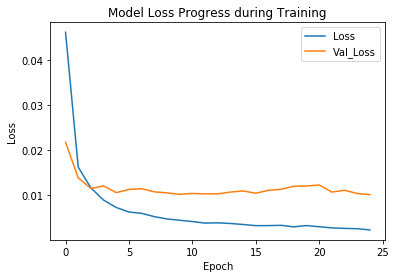

In [73]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss', 'Val_Loss']);

## Model Prediction Results ##

In [ ]:
Y_predict = model.predict(X_test)

Text(0, 0.5, 'True Values')

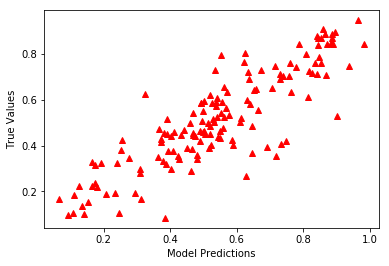

In [75]:
plt.plot(Y_test, Y_predict, '^', color = 'red')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

Text(0, 0.5, 'True Values')

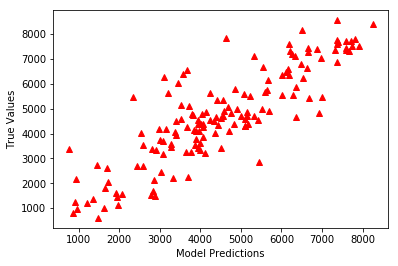

In [76]:
# Return to orginal scale (inverse of normalization)

y_predict_orig = scaler.inverse_transform(Y_predict)
y_test_orig = scaler.inverse_transform(Y_test)
plt.plot(y_predict_orig, y_test_orig, '^', color = 'red')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

## Model Validation Metrics Results ##

In [77]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [78]:
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1-r2) * (n-1) / (n-k-1)

print('MAE', mae)
print('MSE', mse)
print('RMSE', rmse)
print('R2', r2)
print('R2 ADJ', adj_r2)

MAE 735.9996927481931
MSE 1022864.2008772484
RMSE 1011.3674905182826
R2 0.71834694471238
R2 ADJ 0.6295374227748423
